In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [18]:
from sklearn.datasets import make_moons
moon=make_moons(n_samples=2000,noise=0.25)

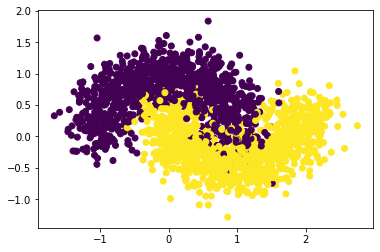

In [19]:
plt.scatter(moon[0][:,0],moon[0][:,1],c=moon[1])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [39]:
X_train.shape

(2, 1500)

In [40]:
y_train.shape

(1, 1500)

In [45]:
def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    
    return (n_x,n_h,n_y)
(n_x,n_h,n_y)=layer_sizes(X_train,y_train)
print("Input layer size: ",n_x)
print("Hidden layer size: ",n_h)
print("Output layer size: ",n_y)

Input layer size:  2
Hidden layer size:  4
Output layer size:  1


In [98]:
def initialize_parameters(n_x,n_h,n_y):
    
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [94]:
print('W1 shape:',parameters['W1'].shape)
print('b1 shape:',parameters['b1'].shape)
print('W2 shape:',parameters['W2'].shape)
print('b2 shape:',parameters['b2'].shape)

W1 shape: (4, 2)
b1 shape: (4,)
W2 shape: (1, 4)
b2 shape: (1,)


In [58]:
def forward_propagation(X,parameters):
    
    W1=parameters['W1']
    W2=parameters['W2']
    b1=parameters['b1']
    b2=parameters['b2']
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [102]:
def compute_cost(A2,Y,parameters):
    m=Y.shape[1]
    cost=-1/m*np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    cost=float(np.squeeze(cost))
    
    return cost

In [64]:
def backward_propagation(parameters,cache,X,Y):
    
    W1=parameters['W1']
    W2=parameters['W2']
    b1=parameters['b1']
    b2=parameters['b2']
    
    Z1=cache['Z1']
    Z2=cache['Z2']
    A1=cache['A1']
    A2=cache['A2']
    
    m=Y.shape[1]
    
    dZ2=A2-Y
    dW2=1/m*np.dot(dZ2,A1.T)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    
    dA1=np.dot(W2.T,dZ2)
    dZ1=dA1*(1-np.power(A1,2))
    dW1=1/m*np.dot(dZ1,X.T)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [65]:
def update_parameters(parameters,grads,learning_rate=1.0):
    W1=parameters['W1']
    W2=parameters['W2']
    b1=parameters['b1']
    b2=parameters['b2']
    
    dW1=grads['dW1']
    dW2=grads['dW2']
    db1=grads['db1']
    db2=grads['db2']
    
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
    parameters={'W1':W1,'W2':W2,'b1':b1,'b2':b2}
    
    return parameters
    

In [111]:
def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False,learning_rate=1.0,random_seed=1):
    np.random.seed(random_seed)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    costs=[]
    for i in range(num_iterations):
        A2,cache=forward_propagation(X,parameters)
        cost=compute_cost(A2,Y,parameters)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=update_parameters(parameters,grads,learning_rate=learning_rate)
        
        if i%10==0:
            costs.append(cost)
        if print_cost and i%1000==0:
            print("Cost After {}th Iteration: {:.4f}".format(i,cost))
            
    plt.plot(range(0,num_iterations,10),costs)
            
    return parameters
    
    

Cost After 0th Iteration: 0.6933


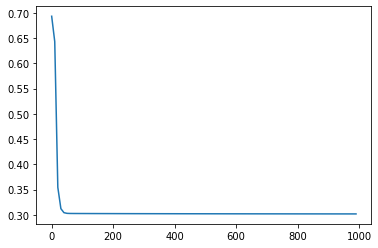

In [182]:
parameters=nn_model(X_train,y_train,20,1000,True,1,3)

In [177]:
def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    prediction=(A2>0.5)
    return prediction

In [183]:
prediction=predict(parameters,X_train)
prediction2=predict(parameters,X_test)
print('train score : ',100-np.sum(np.abs((y_train-prediction.astype(int))))/y_train.shape[1]*100)
print('test score : ',100-np.sum(np.abs((y_test-prediction2.astype(int))))/y_test.shape[1]*100)

train score :  86.93333333333334
test score :  84.2


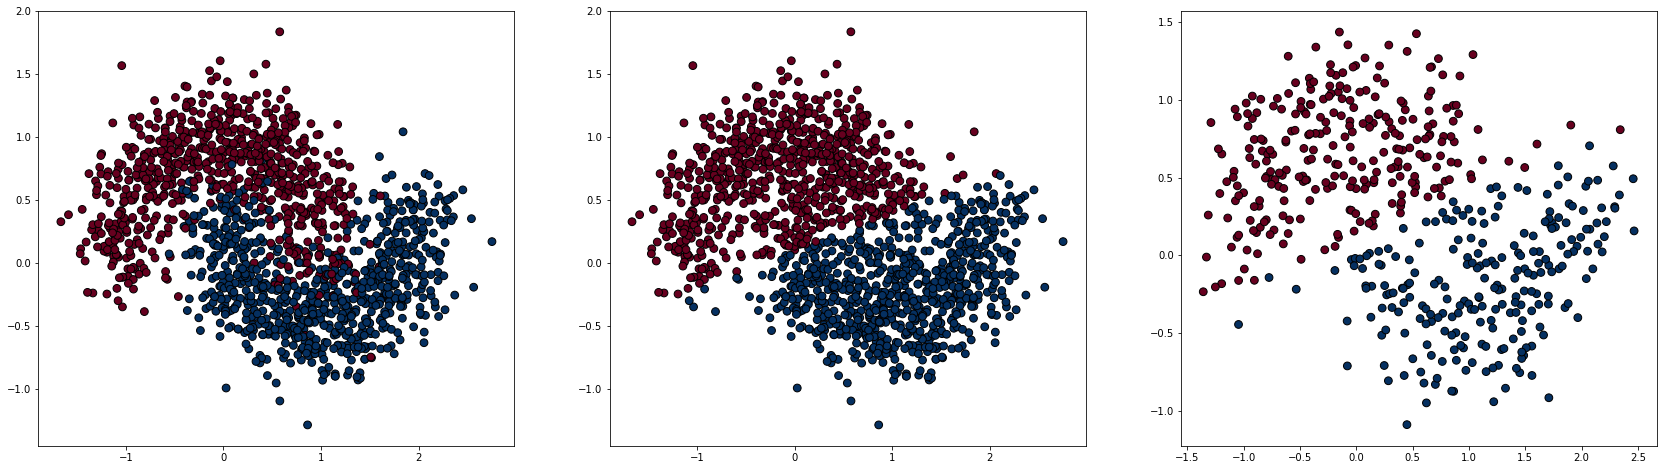

In [189]:
fig,axes=plt.subplots(1,3,figsize=(29,8))
axes[0].scatter(X_train.T[:,0],X_train.T[:,1],c=np.squeeze(y_train),cmap='RdBu',edgecolor='k',s=60)
axes[1].scatter(X_train.T[:,0],X_train.T[:,1],c=np.squeeze(prediction),cmap='RdBu',edgecolor='k',s=60)
axes[2].scatter(X_test.T[:,0],X_test.T[:,1],c=np.squeeze(prediction2),cmap='RdBu',edgecolor='k',s=60)